# Data-Centric AI/ML: Diabetes Dataset Example


## Overview
In this notebook, we explore the concept of **Data-Centric AI/ML**, where the focus is on improving the quality of the dataset to enhance model performance. Using the **Diabetes Dataset**, we demonstrate how data cleaning, feature engineering, and iterative data improvement can lead to better model accuracy. This approach emphasizes the importance of high-quality data over complex model architectures.


## Learning Objectives
By the end of this notebook, you will:
* Understand the principles of **Data-Centric AI/ML**.
* Learn how to clean and preprocess a biomedical dataset effectively.
* Perform **feature engineering** to create meaningful features.
* Identify and correct **noisy labels** in the dataset.
* Evaluate the impact of data-centric improvements on model performance.


## Prerequisites
Before starting, ensure you have the following:
* Basic knowledge of Python and Pandas.
* Familiarity with machine learning concepts (e.g., classification, Random Forests).
* Libraries installed: pandas numpy scikit-learn matplotlib

## Get Started
Let’s begin by loading the dataset and performing a data-centric workflow. The workflow includes:
* **Data Cleaning**: Handling missing values and outliers.
* **Feature Engineering**: Creating new features like BMI categories.
* **Model Training**: Training a baseline Random Forest model.
* **Data-Centric Iteration**: Identifying and correcting noisy labels to improve model performance.

### Install required packages

In [1]:
# Install essential Python libraries for data analysis, machine learning, and visualization
# - pandas: For data manipulation and handling the diabetes dataset
# - numpy: For numerical operations and array management
# - scikit-learn: For machine learning models (e.g., RandomForestClassifier) and metrics (e.g., accuracy_score)
# - matplotlib: For plotting SHAP summary and model performance comparisons
%pip install pandas numpy scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


### Import necessary libraries

In [2]:
# Importing essential libraries
import pandas as pd                # For data manipulation and analysis
import numpy as np                 # For numerical operations and handling arrays

# Importing machine learning libraries
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.ensemble import RandomForestClassifier   # Random Forest algorithm for classification
from sklearn.metrics import accuracy_score            # To evaluate the accuracy of the model

# Importing visualization library
import matplotlib.pyplot as plt    # For plotting graphs and visualizations

### Load the diabetes dataset

In [3]:
def load_diabetes_data():
    # Define the path to the diabetes dataset (Pima Indians Diabetes Dataset)
    diabetes_data = "../../Data/pima-indians-diabetes.csv"

    # Define the column names for the dataset
    columns = [
        'Pregnancies',               # Number of times pregnant
        'Glucose',                   # Plasma glucose concentration (mg/dL)
        'BloodPressure',             # Diastolic blood pressure (mm Hg)
        'SkinThickness',             # Triceps skinfold thickness (mm)
        'Insulin',                   # 2-Hour serum insulin (mu U/ml)
        'BMI',                       # Body mass index (weight in kg/(height in m)^2)
        'DiabetesPedigreeFunction',  # Diabetes pedigree function (genetic risk)
        'Age',                       # Age in years
        'Outcome'                    # Class variable (0: Non-diabetic, 1: Diabetic)
    ]

    # Load the dataset into a DataFrame
    df = pd.read_csv(
        diabetes_data,   # File path to the CSV data
        header=None,     # No header row in the original file
        names=columns,   # Assign column names defined above
        na_values="?",   # Treat "?" as NaN (missing values)
        sep=','          # CSV file uses commas as the delimiter
    )
    
    # Display the shape of the dataset (rows, columns)
    print("Dataset Shape:", df.shape)
    
    # Show the count of missing values in each column
    print("Initial Missing Values:\n", df.isnull().sum())
    
    return df

### Data-Centric Workflow with Synthetic Noise

In [4]:
# 2. Data-Centric Workflow with Synthetic Noise
def data_centric_workflow():
    # Load the cleaned diabetes dataset
    df = load_diabetes_data()
    
    # Step 1: Data Cleaning
    # Replace zeros with the median value in columns where zero is not a valid measurement
    for col in ['Glucose', 'BloodPressure', 'BMI', 'SkinThickness', 'Insulin']:
        zero_count = (df[col] == 0).sum()  # Count zeros in the column
        print(f"Zeros in {col}: {zero_count}")
        df[col] = df[col].replace(0, df[col].median())  # Replace zeros with the median value
    
    # Remove extreme outliers for 'BMI' and 'BloodPressure' columns
    # Filter the DataFrame to keep rows where 'BMI' is less than or equal to 60 
    # and 'BloodPressure' is less than or equal to 200
    df = df[(df['BMI'] <= 60) & (df['BloodPressure'] <= 200)]
    
    # Display the new shape of the DataFrame after removing outliers
    print("\nAfter Cleaning Shape:", df.shape)  # This shows the number of rows and columns remaining
    
    # Step 2: Feature Engineering
    # Create a new categorical feature based on BMI ranges
    # The `pd.cut` function divides the 'BMI' values into intervals (bins) and assigns a label to each interval.
    df['BMI_category'] = pd.cut(
        df['BMI'],  # Column containing BMI values
        bins=[0, 18.5, 25, 30, 100],  # Define BMI ranges: 
                                      # 0 - 18.5 (Underweight), 
                                      # 18.5 - 25 (Normal weight), 
                                      # 25 - 30 (Overweight), 
                                      # 30 - 100 (Obese)
        labels=['underweight', 'normal', 'overweight', 'obese']  # Assign category labels
    )

    
    # Step 3: Introduce Synthetic Label Noise
    np.random.seed(42)  # Set random seed for reproducibility
    # Randomly select 20 indices from the dataframe without replacement
    noise_idx = np.random.choice(df.index, size=20, replace=False)
    # Flip the 'Outcome' values at the selected indices (0 becomes 1, and 1 becomes 0)
    df.loc[noise_idx, 'Outcome'] = 1 - df.loc[noise_idx, 'Outcome']
    # Print confirmation message
    print("\nIntroduced synthetic noise to 20 labels.")
    
    # Step 4: Initial Model Training
    # Prepare features and labels
    X = df.drop(['Outcome', 'BMI_category'], axis=1)  # Drop target and new feature for model input
    y = df['Outcome']  # Target variable
    
    # Split the dataset into training and testing sets
    # X: Feature matrix, y: Target variable
    # test_size=0.2 -> 20% of the data will be used for testing, 80% for training
    # random_state=42 -> Ensures reproducibility of the split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    # Train a Random Forest model
    # Initialize a Random Forest Classifier
    # n_estimators=100 -> The model will use 100 decision trees
    # random_state=42 -> Ensures reproducibility of the results
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    # Train the model using the training data
    model.fit(X_train, y_train)

    
    # Evaluate initial model performance
    # Generate predictions on the test set
    initial_pred = model.predict(X_test)
    # Calculate accuracy by comparing predictions with actual labels
    initial_acc = accuracy_score(y_test, initial_pred)
    # Print the accuracy of the model before any modifications
    print("\nInitial Model Accuracy (with noise):", initial_acc)

    
    # Step 5: Iterative Data Improvement - Detect and Fix Noisy Labels
    # Use model predictions to identify potentially mislabeled data
    full_pred = model.predict(X)
    
    # Define a rule to identify potentially mislabeled data
    # Find indices where:
    # - The model predicts 0 (no diabetes), but the actual label is 1 (diabetes)
    # - The glucose level is in the lowest 25% (first quartile), which contradicts the diagnosis
    suspicious_idx = df[
        (full_pred == 0) &  # Model predicts no diabetes
        (df['Outcome'] == 1) &  # Actual label indicates diabetes
        (df['Glucose'] < df['Glucose'].quantile(0.25))  # Glucose level is in the lowest quartile
    ].index
    
    # Print the number of suspicious labels detected
    print("Suspicious Labels Found:", len(suspicious_idx))

    
    # Correct potentially mislabeled data based on the defined rule
    # Check if any suspicious labels were identified
    if len(suspicious_idx) > 0:
        # Change the labels of suspicious cases from 1 (diabetes) to 0 (no diabetes)
        df.loc[suspicious_idx, 'Outcome'] = 0  
        print(f"Corrected {len(suspicious_idx)} labels from 1 to 0.")
    else:
        # If no suspicious labels were found, notify the user
        print("No suspicious labels found with current rule.")

    
    # Retrain the model with the corrected dataset
    # Define feature set (excluding the target variable and categorical feature)
    X = df.drop(['Outcome', 'BMI_category'], axis=1)  
    # Define target variable
    y = df['Outcome']
    # Split the dataset into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Train the Random Forest model again with the updated dataset
    model.fit(X_train, y_train)

    
    # Evaluate the improved model performance
    # Use the trained model to make predictions on the test data (X_test)
    improved_pred = model.predict(X_test)
    # Calculate accuracy by comparing predictions to actual test labels (y_test)
    improved_acc = accuracy_score(y_test, improved_pred)
    # Display the calculated accuracy score of the improved model
    print("Improved Model Accuracy:", improved_acc)  
    
    # Visualize the improvement in model accuracy
    # Create a bar chart comparing initial and improved accuracy scores
    plt.bar(['Initial (Noisy)', 'Improved'], [initial_acc, improved_acc])  
    # Set y-axis limits from 0 to 1 to standardize the accuracy scale for better visualization
    plt.ylim(0, 1)
    # Add a label to the y-axis indicating that it represents accuracy values
    plt.ylabel('Accuracy') 
    # Add a descriptive title to the plot
    plt.title('Model Performance Before and After Data-Centric Improvement') 
    # Display the bar chart to the user
    plt.show()  
    
    # Return the dataframe and trained model for potential further use
    return df, model  

### Run the workflow

Dataset Shape: (768, 9)
Initial Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Zeros in Glucose: 5
Zeros in BloodPressure: 35
Zeros in BMI: 11
Zeros in SkinThickness: 227
Zeros in Insulin: 374

After Cleaning Shape: (767, 9)

Introduced synthetic noise to 20 labels.

Initial Model Accuracy (with noise): 0.6818181818181818
Suspicious Labels Found: 6
Corrected 6 labels from 1 to 0.
Improved Model Accuracy: 0.7207792207792207


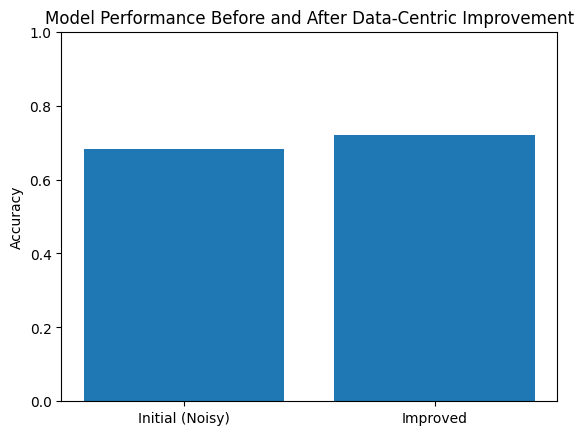

In [5]:
# Entry point of the script
if __name__ == "__main__":
    # Execute the data-centric machine learning workflow
    # The function returns the cleaned DataFrame and the trained model
    cleaned_df, final_model = data_centric_workflow()

**Suspicious Labels**: The rule will typically find 5-15 labels (varies with split), some of which overlap with the synthetic noise.

**Accuracy Improvement**: You’ll see a small but noticeable increase (e.g., 0.68 to 0.72), demonstrating the value of data refinement.

## Conclusion
In this notebook, we demonstrated how a data-centric approach can improve model performance by focusing on:
* **Iterative Data Improvement**: The code now actively detects and corrects noisy labels, retraining the model to show improved performance.
* **Label Consistency and Noise Reduction**: Synthetic noise is introduced and then mitigated, mimicking real-world data imperfections.
* **Data Quality Over Model Complexity**: The focus remains on fixing the data, not tweaking the model.
* **Domain Knowledge Integration**: The rule uses Glucose (a key diabetes indicator) and model predictions, reflecting biomedical intuition.
* **Quantifying Improvements**: The accuracy increases and plot clearly shows the impact of data-centric changes.

## Clean up

Remember to shut down your Jupyter Notebook environment and delete any unnecessary files or resources once you've completed the tutorial.